In [1]:
import os
import pandas as pd
pasta_mestrado = 'E:/mestrado/Pesquisa/Dados simulados'
redes = ['CNN', 'LSTM']
caminho_var = f'{pasta_mestrado}/resultados VAR.csv'
steps_ahead_list = [1, 5, 20]

In [2]:
datasets = {}
paths = {}
for rede in redes:
    datasets[rede] = {}
    paths[rede] = {}
    data_indices = set()
    for steps_ahead in steps_ahead_list:
        paths[rede][steps_ahead] = f'{pasta_mestrado}/Saída da otimização de hiperparâmetros {rede}/{steps_ahead} steps ahead'
        current_data_indices = set(os.listdir(paths[rede][steps_ahead]))
        if data_indices == set():
            data_indices = current_data_indices
        else:
            data_indices = data_indices.intersection(current_data_indices)
        datasets[rede][steps_ahead] = pd.DataFrame()
    for data_index in data_indices:
        for steps_ahead in steps_ahead_list:
            current_df = pd.read_csv(f'{paths[rede][steps_ahead]}/{data_index}/opt_hist.csv')
            current_df['data_set_index'] = data_index
            datasets[rede][steps_ahead] = pd.concat([datasets[rede][steps_ahead], current_df])
            del current_df

In [3]:
datasets

{'CNN': {1:     win_size  filters_conv_1 kernel_size_conv_1 activation_conv_1 pool_size_1  \
  0         81              46             (3, 2)              relu      (2, 1)   
  1         90              16             (2, 2)           sigmoid      (3, 1)   
  2         88              46             (3, 2)              tanh      (2, 1)   
  3         72              39             (3, 2)             swish      (3, 1)   
  4         88              20             (2, 2)           sigmoid      (3, 1)   
  ..       ...             ...                ...               ...         ...   
  95        60              23             (3, 2)           sigmoid      (2, 1)   
  96        53              30             (3, 2)             swish      (2, 1)   
  97        67              27             (2, 2)              tanh      (2, 1)   
  98        58              25             (2, 2)              relu      (2, 1)   
  99        62              33             (3, 2)             swish      (2, 

{'CNN': {1:     win_size  filters_conv_1 kernel_size_conv_1 activation_conv_1 pool_size_1  \
  0         81              46             (3, 2)              relu      (2, 1)   
  1         90              16             (2, 2)           sigmoid      (3, 1)   
  2         88              46             (3, 2)              tanh      (2, 1)   
  3         72              39             (3, 2)             swish      (3, 1)   
  4         88              20             (2, 2)           sigmoid      (3, 1)   
  ..       ...             ...                ...               ...         ...   
  95        60              23             (3, 2)           sigmoid      (2, 1)   
  96        53              30             (3, 2)             swish      (2, 1)   
  97        67              27             (2, 2)              tanh      (2, 1)   
  98        58              25             (2, 2)              relu      (2, 1)   
  99        62              33             (3, 2)             swish      (2, 

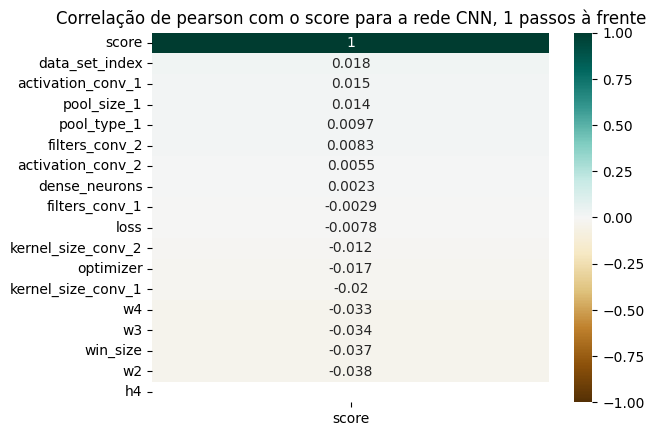

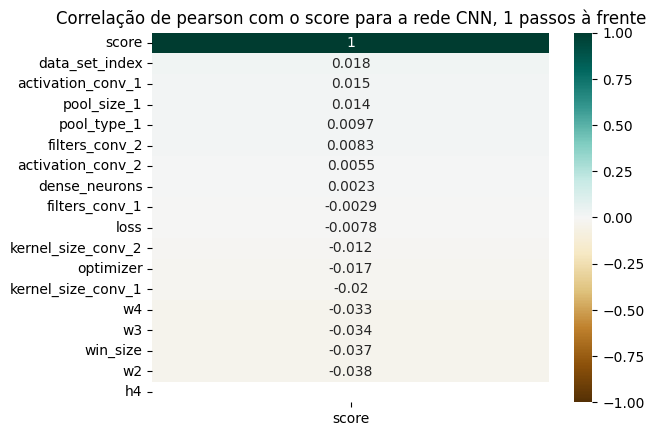

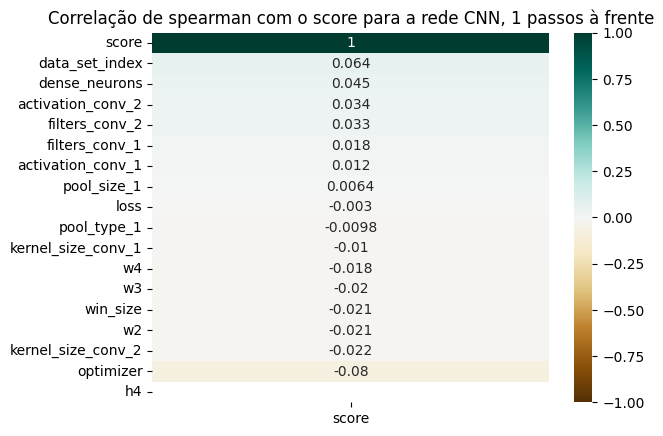

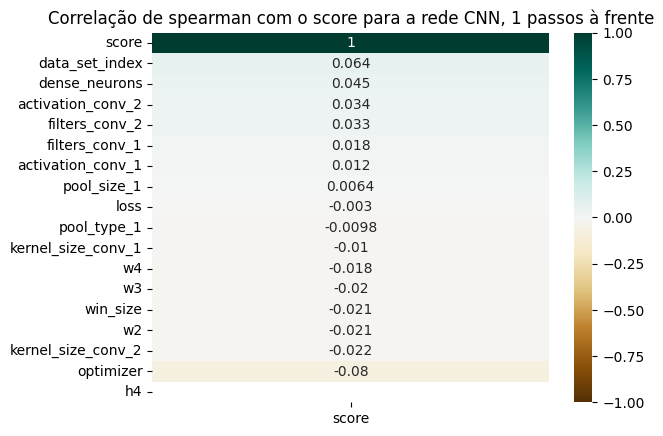

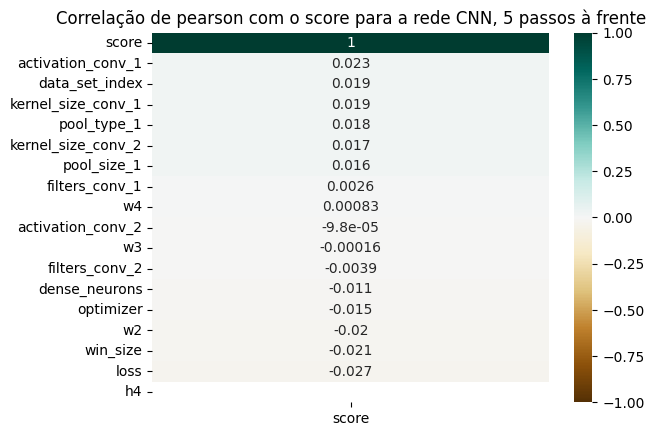

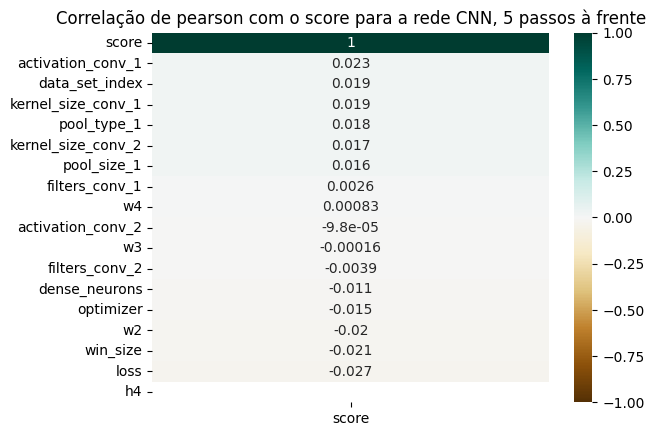

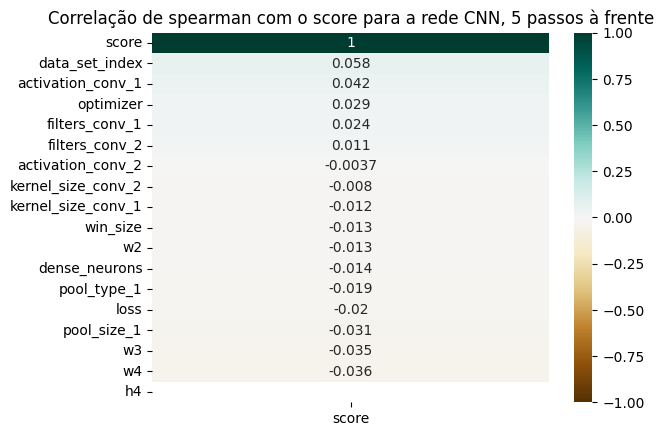

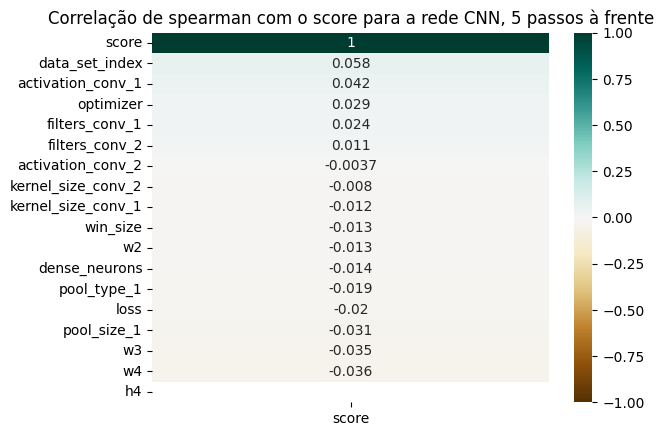

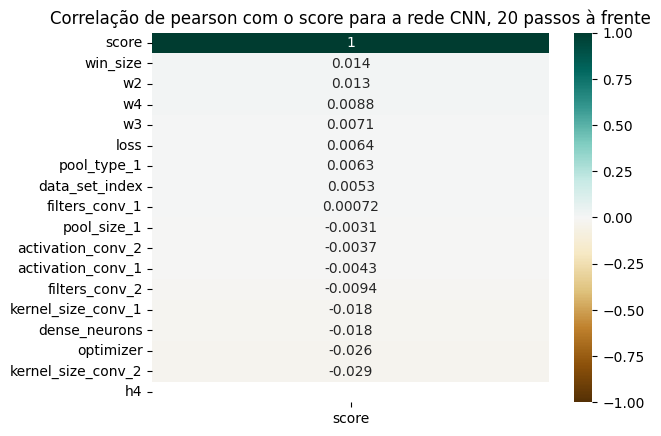

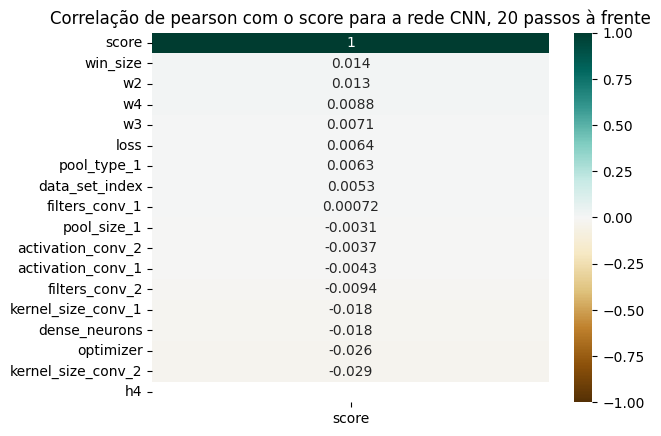

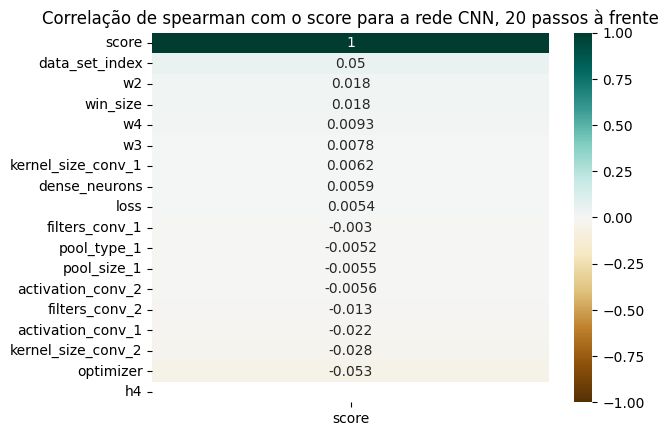

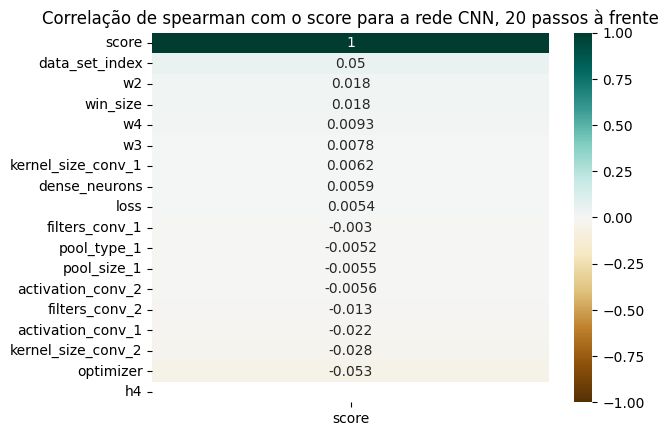

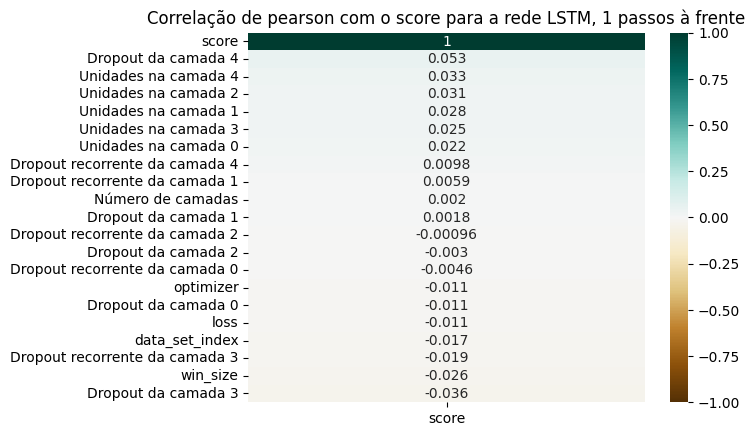

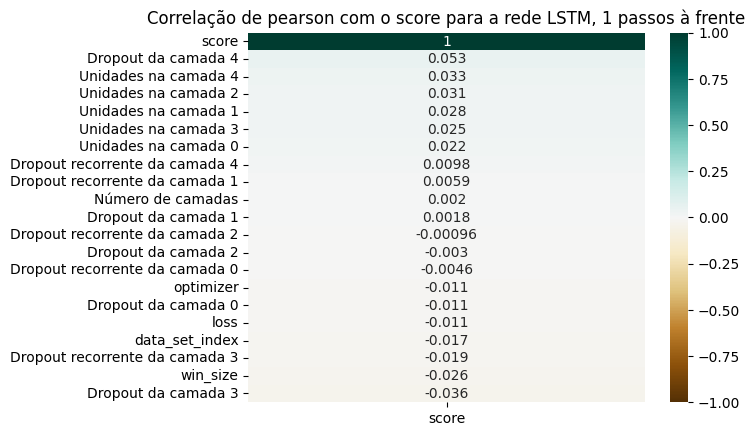

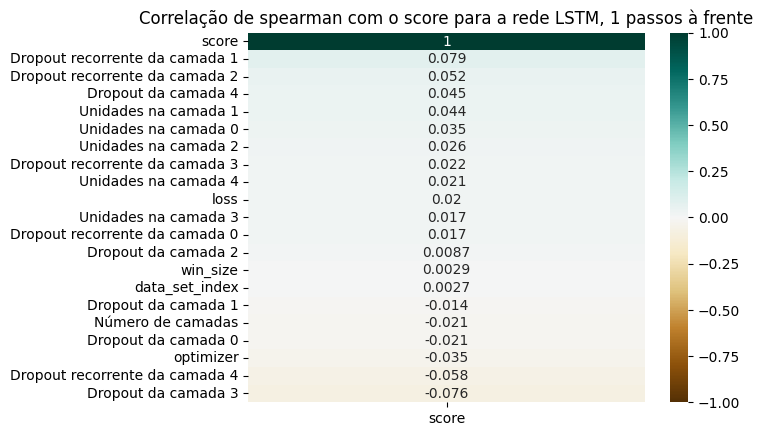

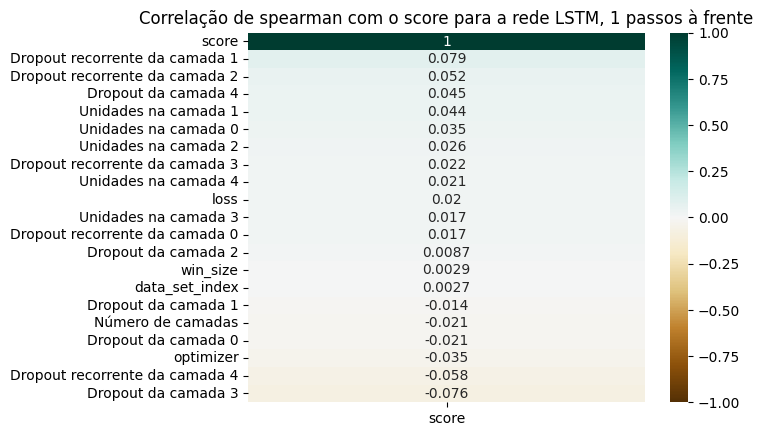

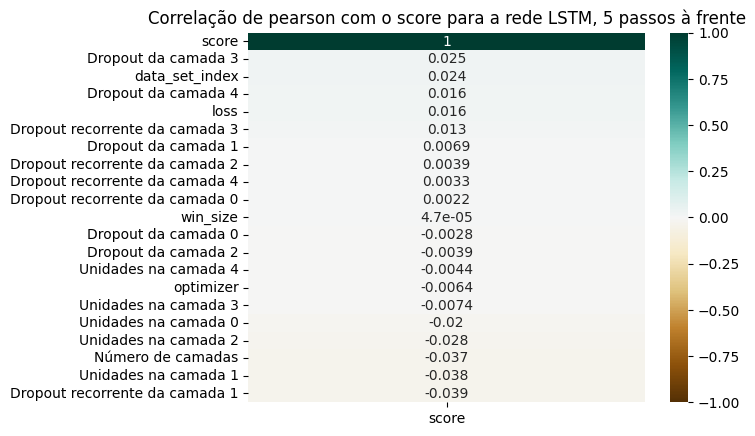

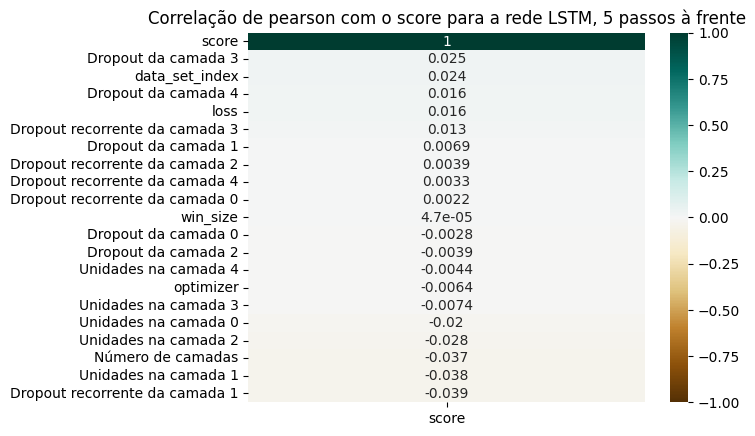

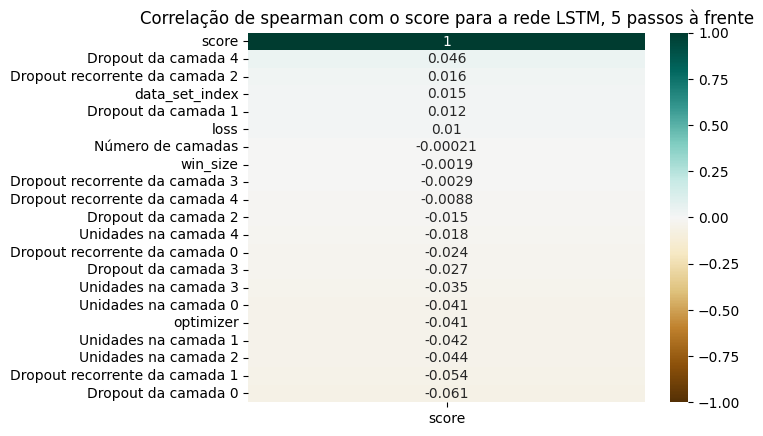

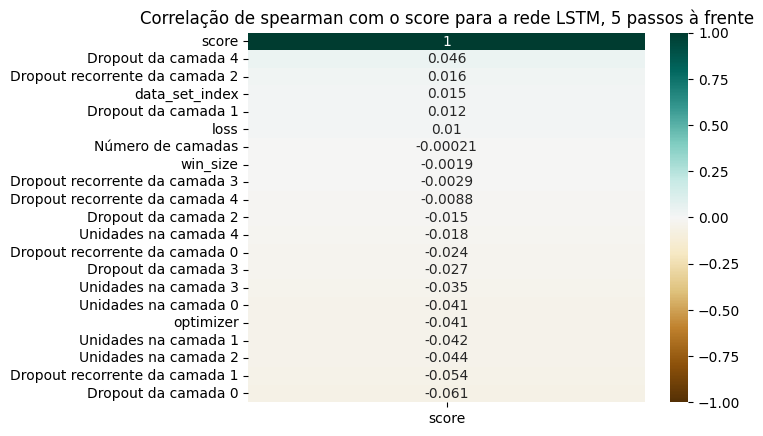

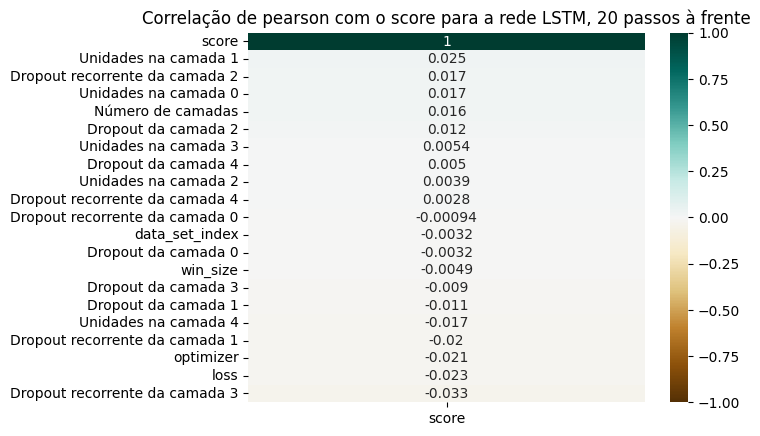

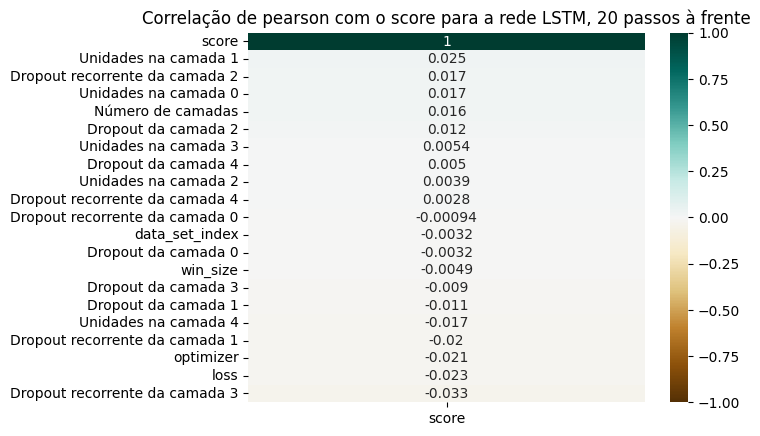

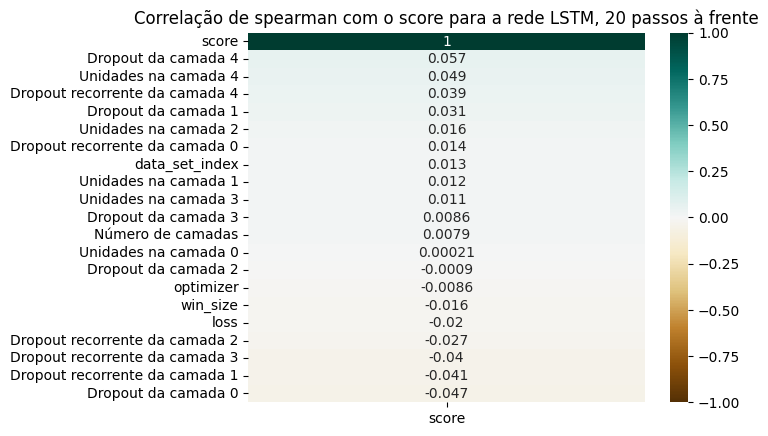

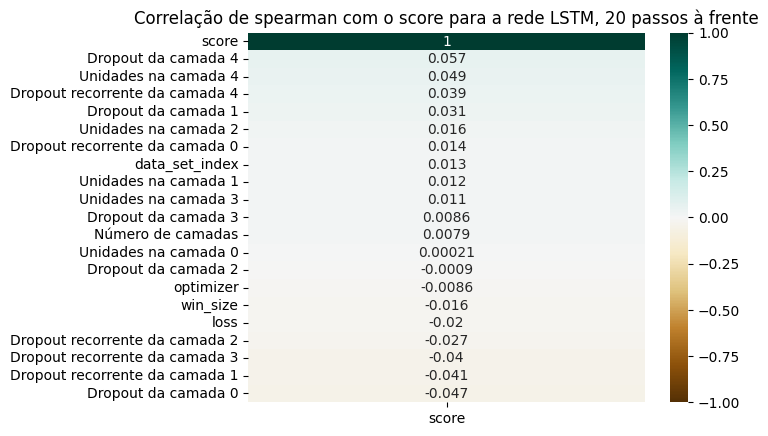

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
correlations = ['pearson', 'spearman']
for rede in redes:
    for steps_ahead in steps_ahead_list:
        df_encoded = datasets[rede][steps_ahead].apply(lambda col: col.map(lambda x: list(col.values).index(x)) if col.dtype == 'object' else col, axis=0)
        for correlation in correlations:
            plt.figure()
            heatmap = sns.heatmap(df_encoded.corr(method=correlation)[['score']].sort_values(by='score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
            heatmap.set_title(f'Correlação de {correlation} com o score para a rede {rede}, {steps_ahead} passos à frente')
            plt.show()

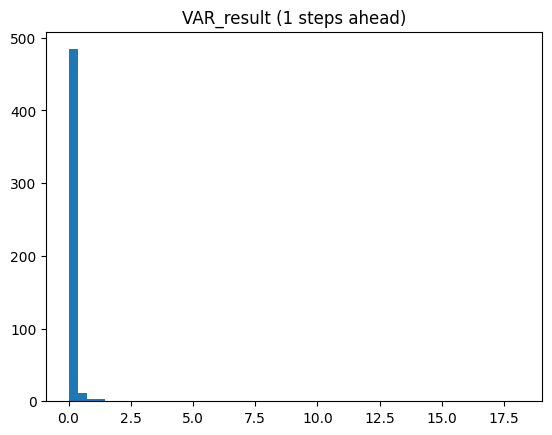

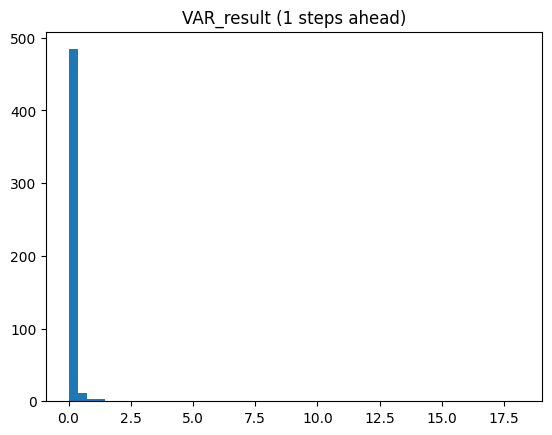

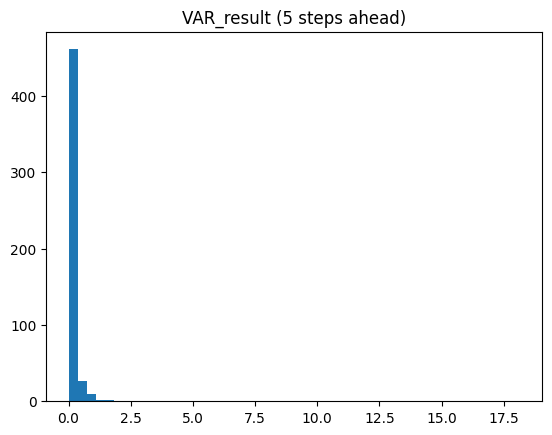

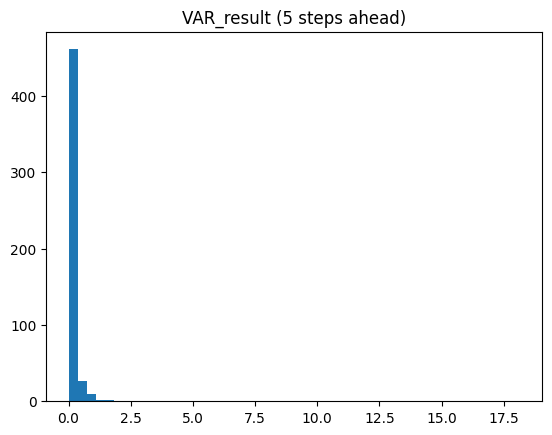

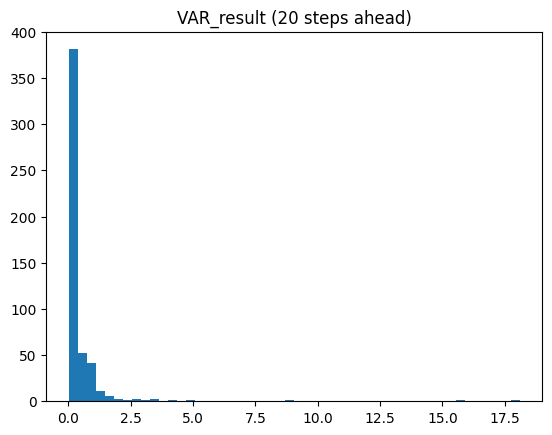

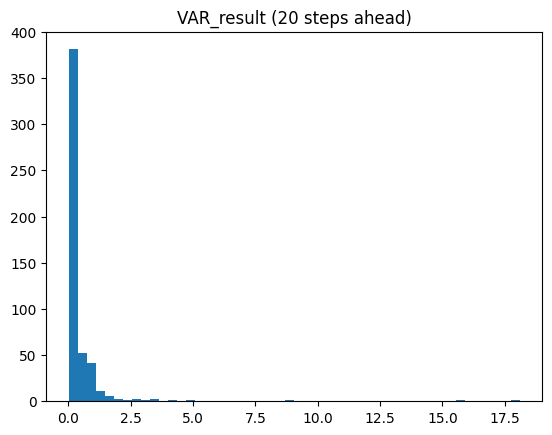

In [5]:
var_df = pd.read_csv(caminho_var)
data_indices = list(var_df['Data_index'].values)
for c in var_df.columns:
    if c != 'Data_index':
        plt.figure()
        plt.title(c)
        plt.hist(var_df[c], bins=50)
        plt.show()

In [6]:
print(var_df.shape)

(1001, 4)
(1001, 4)


In [7]:
var_summary = pd.DataFrame({'média': var_df.mean(), 'desvio': var_df.std()}).iloc[1:]
var_summary

,média,desvio
VAR_result (1 steps ahead),0.143463,0.940996
VAR_result (5 steps ahead),0.196819,0.983680
VAR_result (20 steps ahead),0.387075,1.245862


,média,desvio
VAR_result (1 steps ahead),0.143463,0.940996
VAR_result (5 steps ahead),0.196819,0.983680
VAR_result (20 steps ahead),0.387075,1.245862


In [8]:
var_df = var_df.iloc[:datasets[rede][steps_ahead].groupby('data_set_index')['score'].min().shape[0]]
print(var_df.shape)
data_indices = list(var_df['Data_index'].values)

(56, 4)
(56, 4)


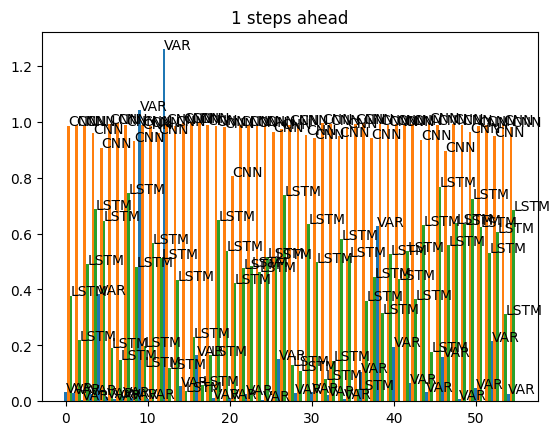

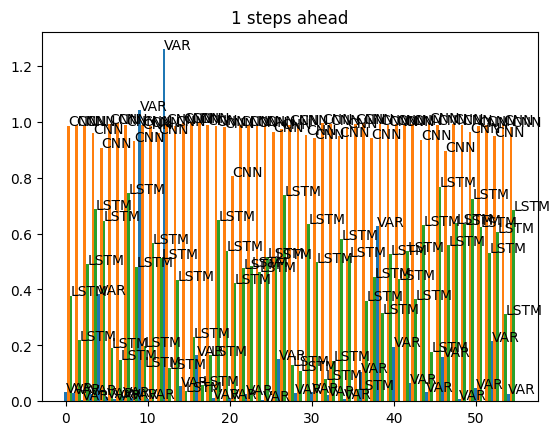

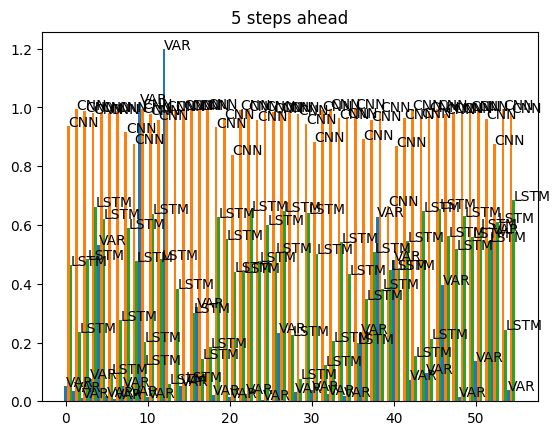

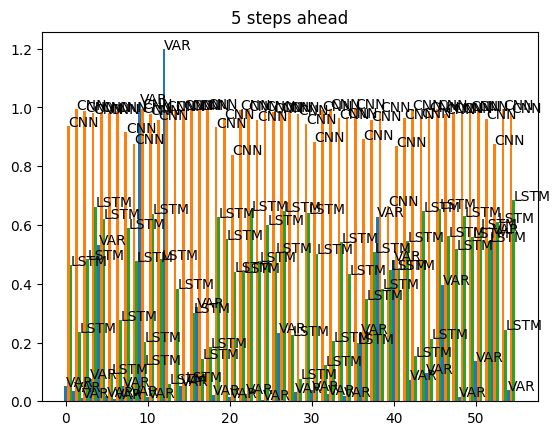

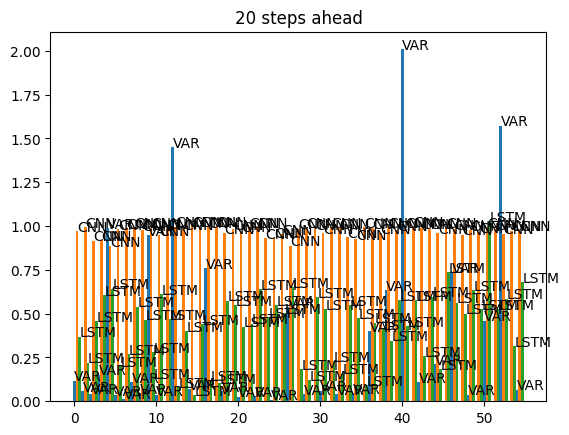

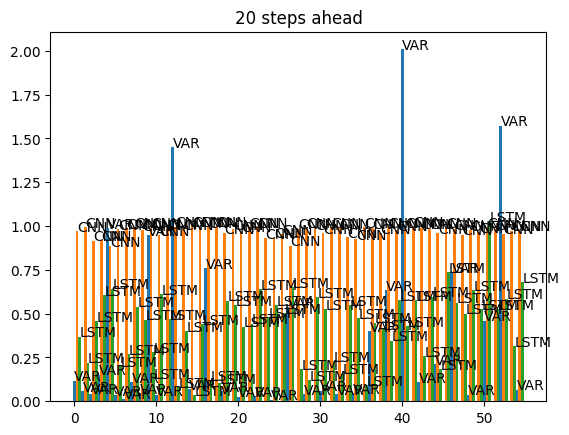

In [9]:
for steps_ahead in steps_ahead_list:
    var_scores = list(var_df[f'VAR_result ({steps_ahead} steps ahead)'].values)
    fig, ax = plt.subplots()
    bar_width = 1/(len(redes)+1)
    ax.set_title(f'{steps_ahead} steps ahead')
    ax.bar(data_indices, var_scores, bar_width, label="VAR")
    for x, y in zip(data_indices, var_scores):
        plt.annotate("VAR", (x, y))
    for index, rede in enumerate(redes):
        current_x_axis = [x+bar_width*(index+1) for x in data_indices]
        current_net_scores = list(datasets[rede][steps_ahead].groupby('data_set_index')['score'].min().values)
        ax.bar(current_x_axis, current_net_scores, bar_width, label=rede)
        for x, y in zip(current_x_axis, current_net_scores):
            plt.annotate(rede, (x, y))
    plt.show()

In [10]:
var_summary = pd.DataFrame({'média': var_df.mean(), 'desvio': var_df.std()}).iloc[1:]
var_summary

,média,desvio
VAR_result (1 steps ahead),0.146460,0.289868
VAR_result (5 steps ahead),0.196459,0.298305
VAR_result (20 steps ahead),0.360615,0.515589


,média,desvio
VAR_result (1 steps ahead),0.146460,0.289868
VAR_result (5 steps ahead),0.196459,0.298305
VAR_result (20 steps ahead),0.360615,0.515589


In [11]:
from scipy.stats import mannwhitneyu
nets_summaries = {}
for rede in redes:
    nets_summaries[rede] = {}
    for steps_ahead in steps_ahead_list:
        best_scores_opt = datasets[rede][steps_ahead].groupby('data_set_index')['score'].min()
        nets_summaries[rede][steps_ahead] = pd.Series({
            'Média': best_scores_opt.mean(), 'Desvio': best_scores_opt.std()
        })
        print(rede)
        print(f"{steps_ahead} passos à frente")
        print(nets_summaries[rede][steps_ahead])
        print("TESTE DE MANN-WHITNEY COMPARANDO COM O VAR")
        alpha = 0.05
        U1, p = mannwhitneyu(best_scores_opt.values, var_df[f"VAR_result ({steps_ahead} steps ahead)"].values)
        nx, ny = len(best_scores_opt.values), var_df.shape[0]
        U2 = nx*ny - U1
        U = min(U1, U2)
        print(f"Estatística de teste: U={U}")
        if p < alpha:
            if best_scores_opt.mean() > var_df[f"VAR_result ({steps_ahead} steps ahead)"].mean():
                print(f"Pelo teste de Mann-Whitney o VAR se saiu melhor com nível de significância α={alpha}")
            else:
                print(f"Pelo teste de Mann-Whitney este modelo se saiu melhor que o VAR com nível de significância α={alpha}")
        else:
            print(f"Pelo teste de Mann-Whitney com nível de significância α={alpha} não há evidência suficiente para dizer que as distribuições não sejam iguais")

CNN
1 passos à frente
Média     0.974588
Desvio    0.032498
dtype: float64
TESTE DE MANN-WHITNEY COMPARANDO COM O VAR
Estatística de teste: U=nan
Pelo teste de Mann-Whitney com nível de significância α=0.05 não há evidência suficiente para dizer que as distribuições não sejam iguais
CNN
5 passos à frente
Média     0.962088
Desvio    0.055338
dtype: float64
TESTE DE MANN-WHITNEY COMPARANDO COM O VAR
Estatística de teste: U=nan
Pelo teste de Mann-Whitney com nível de significância α=0.05 não há evidência suficiente para dizer que as distribuições não sejam iguais
CNN
20 passos à frente
Média     0.972007
Desvio    0.027168
dtype: float64
TESTE DE MANN-WHITNEY COMPARANDO COM O VAR
Estatística de teste: U=nan
Pelo teste de Mann-Whitney com nível de significância α=0.05 não há evidência suficiente para dizer que as distribuições não sejam iguais
LSTM
1 passos à frente
Média     0.425635
Desvio    0.212142
dtype: float64
TESTE DE MANN-WHITNEY COMPARANDO COM O VAR
Estatística de teste: U=nan


In [12]:
my_var_result = {}
my_var_result["1 steps ahead"]: [0.143463, 0.940996]
my_var_result["5 steps ahead"]: [0.196819, 0.983680]
my_var_result["20 steps ahead"]: [0.387075, 1.245862]
var_results_dailys = {
    "1 steps ahead": [0.449, 2.5723],
    "5 steps ahead": [1.2580, 2.0818],
    "20 steps ahead": [0.6911, 5.7678]
}
'''
for steps_ahead in steps_ahead_list:
    alpha = 0.05
    U1, p = mannwhitneyu(best_scores_opt.values, my_var_result[f"VAR_result ({steps_ahead} steps ahead)"].values)
    nx, ny = len(best_scores_opt.values), var_df.shape[0]
    U2 = nx*ny - U1
    U = min(U1, U2)
    print(f"Estatística de teste: U={U}")
    if p < alpha:
        if best_scores_opt.mean() > var_df[f"VAR_result ({steps_ahead} steps ahead)"].mean():
            print(f"Pelo teste de Mann-Whitney o VAR se saiu melhor com nível de significância α={alpha}")
        else:
            print(f"Pelo teste de Mann-Whitney este modelo se saiu melhor que o VAR com nível de significância α={alpha}")
    else:
        print(f"Pelo teste de Mann-Whitney com nível de significância α={alpha} não há evidência suficiente para dizer que as distribuições não sejam iguais")
'''

'\nfor steps_ahead in steps_ahead_list:\n    alpha = 0.05\n    U1, p = mannwhitneyu(best_scores_opt.values, my_var_result[f"VAR_result ({steps_ahead} steps ahead)"].values)\n    nx, ny = len(best_scores_opt.values), var_df.shape[0]\n    U2 = nx*ny - U1\n    U = min(U1, U2)\n    print(f"Estatística de teste: U={U}")\n    if p < alpha:\n        if best_scores_opt.mean() > var_df[f"VAR_result ({steps_ahead} steps ahead)"].mean():\n            print(f"Pelo teste de Mann-Whitney o VAR se saiu melhor com nível de significância α={alpha}")\n        else:\n            print(f"Pelo teste de Mann-Whitney este modelo se saiu melhor que o VAR com nível de significância α={alpha}")\n    else:\n        print(f"Pelo teste de Mann-Whitney com nível de significância α={alpha} não há evidência suficiente para dizer que as distribuições não sejam iguais")\n'

'\nfor steps_ahead in steps_ahead_list:\n    alpha = 0.05\n    U1, p = mannwhitneyu(best_scores_opt.values, my_var_result[f"VAR_result ({steps_ahead} steps ahead)"].values)\n    nx, ny = len(best_scores_opt.values), var_df.shape[0]\n    U2 = nx*ny - U1\n    U = min(U1, U2)\n    print(f"Estatística de teste: U={U}")\n    if p < alpha:\n        if best_scores_opt.mean() > var_df[f"VAR_result ({steps_ahead} steps ahead)"].mean():\n            print(f"Pelo teste de Mann-Whitney o VAR se saiu melhor com nível de significância α={alpha}")\n        else:\n            print(f"Pelo teste de Mann-Whitney este modelo se saiu melhor que o VAR com nível de significância α={alpha}")\n    else:\n        print(f"Pelo teste de Mann-Whitney com nível de significância α={alpha} não há evidência suficiente para dizer que as distribuições não sejam iguais")\n'

In [13]:
pasta_dados_reais = "E:/mestrado/Pesquisa/Dados reais"
var_results_dados_reais = pd.read_csv(f"{pasta_dados_reais}/resultados VAR.csv")
for data_set_path in var_results_dados_reais['Data_set'].values:
    data_set = data_set_path.replace('\\', '/').split('/')[-1]
    for steps_ahead in steps_ahead_list:
        print(f"VAR: ({steps_ahead} steps ahead)", var_results_dados_reais[var_results_dados_reais['Data_set'] == data_set_path][f"VAR_result ({steps_ahead} steps ahead)"].iloc[0])
        for net_type in redes:
            resultado = pd.read_csv(f"{pasta_dados_reais}/Saída da otimização de hiperparâmetros {net_type}/{data_set}/{steps_ahead} steps ahead/opt_hist.csv").score.min()
            print(f'{net_type} ({steps_ahead} steps ahead): {resultado}')

VAR: (1 steps ahead) 0.0652956882954507
CNN (1 steps ahead): 0.1130448668147499
LSTM (1 steps ahead): 0.1540597466992013
VAR: (5 steps ahead) 0.0678578452534852
CNN (5 steps ahead): 0.1180445830542928
LSTM (5 steps ahead): 0.1339958361391785
VAR: (20 steps ahead) 0.0702139206182313
CNN (20 steps ahead): 0.120219419418821
LSTM (20 steps ahead): 0.1523414882547999
VAR: (1 steps ahead) 0.0652956882954507
CNN (1 steps ahead): 0.1130448668147499
LSTM (1 steps ahead): 0.1540597466992013
VAR: (5 steps ahead) 0.0678578452534852
CNN (5 steps ahead): 0.1180445830542928
LSTM (5 steps ahead): 0.1339958361391785
VAR: (20 steps ahead) 0.0702139206182313
CNN (20 steps ahead): 0.120219419418821
LSTM (20 steps ahead): 0.1523414882547999


In [14]:
def plot_single_box_plot_series(box_plot_series, splitters=[], title=''):
    fig, ax = plt.subplots()
    if title != '':
        ax.set_title(title)
    ax.bxp(box_plot_series, showfliers=False)
    if splitters:
        for splitter in splitters:
            ax.axvline(splitter)
    plt.show()

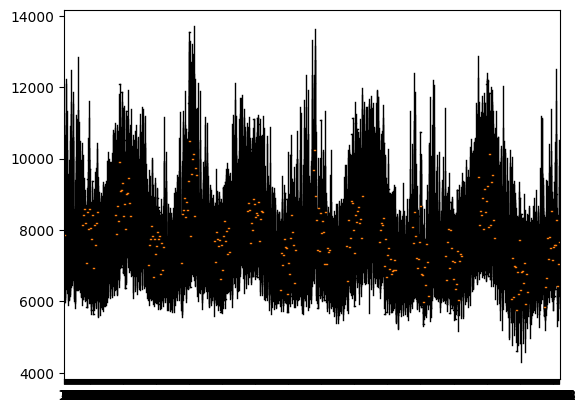

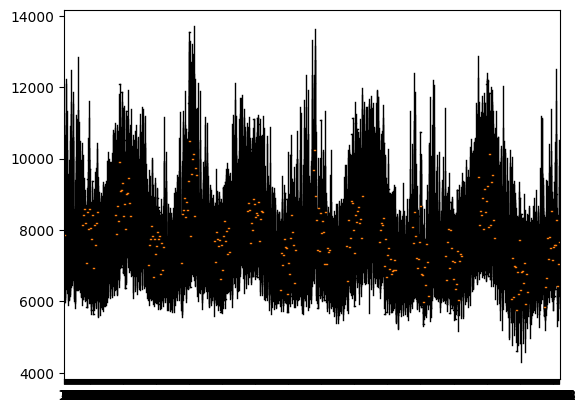

In [15]:
pasta_dados = r"E:\mestrado\Pesquisa\Dados reais\Dados tratados\demanda energética - kaggle"
train_series = pd.read_csv(f"{pasta_dados}/train.csv")
train_series = train_series[[c for c in train_series.columns if c != 'SETTLEMENTDATE']].to_dict('records')
plot_single_box_plot_series(train_series)

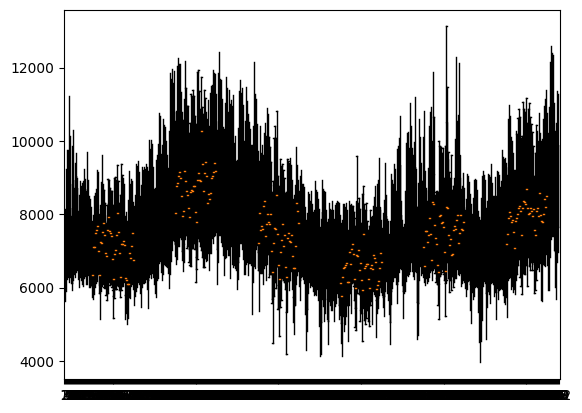

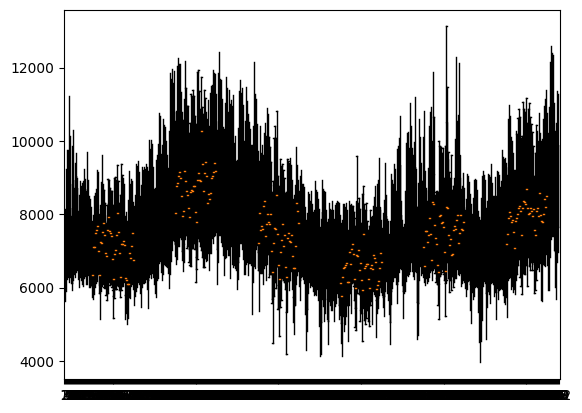

In [16]:
pasta_dados = r"E:\mestrado\Pesquisa\Dados reais\Dados tratados\demanda energética - kaggle"
test_series = pd.read_csv(f"{pasta_dados}/test.csv")
test_series = test_series[[c for c in test_series.columns if c != 'SETTLEMENTDATE']].to_dict('records')
plot_single_box_plot_series(test_series)

In [17]:
from typing import Literal, List
def create_model(
    input_shape=(20, 5, 1), filters_conv_1=32, kernel_size_conv_1=(4, 1), activation_conv_1='relu',
    pool_size_1=(2, 2), pool_type_1: Literal["max", "average"] = "max",
    filters_conv_2=16, kernel_size_conv_2=(1, 2), activation_conv_2='relu',
    dense_neurons=16, dense_activation='relu'
):
    input = Input(shape=input_shape)
    conv_1 = layers.Conv2D(
        filters_conv_1, kernel_size_conv_1, activation=activation_conv_1, input_shape=input_shape
    )(input)
    if pool_type_1 == 'max':
        pooling_1 = layers.MaxPooling2D(pool_size_1)(conv_1)
    else:
        pooling_1 = layers.AveragePooling2D(pool_size_1)(conv_1)
    conv_2 = layers.Conv2D(filters_conv_2, kernel_size_conv_2, activation=activation_conv_2)(pooling_1)
    flatten = layers.Flatten()(conv_2)
    hidden_dense = layers.Dense(dense_neurons, activation=dense_activation)(flatten)
    out_min = layers.Dense(1)(hidden_dense)
    out_ranges = layers.Dense(input_shape[1]-1, activation='relu')(hidden_dense)
    out = layers.concatenate([out_min, out_ranges])
    return Model(inputs=[input], outputs=[out])


def create_lstm_model(
    input_shape: tuple, num_units_by_layer: List[int], activations: List[str], recurrent_activations: List[str],
    dropouts: List[float], recurrent_dropouts: List[float]
):
    input_ = Input(shape=input_shape)
    for i, (num_units, activation, recurrent_activation, dropout, recurrent_dropout) in enumerate(zip(
            num_units_by_layer, activations, recurrent_activations, dropouts, recurrent_dropouts
    )):
        if i == 0:
            lstm_out = layers.LSTM(
                num_units, activation=activation, recurrent_activation=recurrent_activation, dropout=dropout,
                recurrent_dropout=recurrent_dropout, return_sequences=(i<len(dropouts)-1)
            )(input_)
        else:
            lstm_out = layers.LSTM(
                num_units, activation=activation, recurrent_activation=recurrent_activation, dropout=dropout,
                recurrent_dropout=recurrent_dropout, return_sequences=(i < len(dropouts) - 1)
            )(lstm_out)
    out_min = layers.Dense(1)(lstm_out)
    out_ranges = layers.Dense(input_shape[1] - 1, activation='relu')(lstm_out)
    out = layers.concatenate([out_min, out_ranges])
    model = Model(inputs=[input_], outputs=[out])
    return model

In [18]:
def images_and_targets_from_data_series(data, input_win_size=20, steps_ahead = 1):
    if steps_ahead <= 0:
        raise ValueError("Can't predict negative steps ahead")
    data = list(map(lambda x: list(x.values()), data))
    images = []
    all_targets = []
    inverse_normalizations = []
    normalizations = []
    for i in range(len(data)-1-steps_ahead-input_win_size):
        image = np.array(data[i:input_win_size+i])
        image = np.expand_dims(image, len(image.shape))
        inverse_normalization = lambda x: (np.max(image) - np.min(image))*x + np.min(image)
        normalization = lambda x: (x - np.min(image))/(np.max(image) - np.min(image))
        normalized_image = normalization(image)
        normalizations.append(normalization)
        targets = np.array([data[input_win_size + i + s] for s in range(steps_ahead)])
        images.append(normalized_image)
        all_targets.append(targets)
        inverse_normalizations.append(inverse_normalization)
        assert (all([b_plot[0] < b_plot[1] < b_plot[2] < b_plot[3] < b_plot[4] for targets in all_targets for b_plot in
                     targets]))
    return np.array(images), np.array(all_targets), inverse_normalizations, normalizations


(116, 5, 1)
(116, 5, 1)


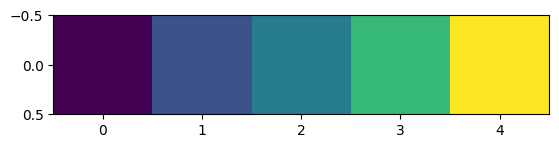

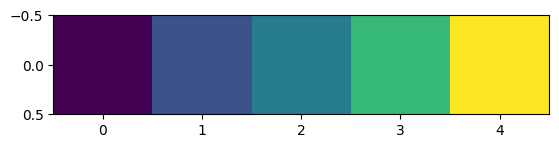

(91, 5, 1)
(91, 5, 1)


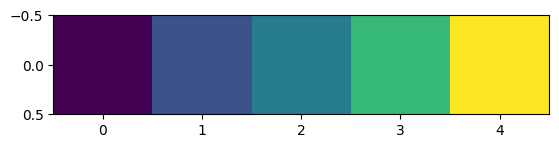

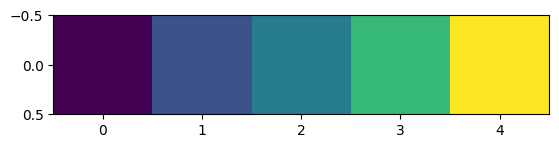

(125, 5, 1)
(125, 5, 1)


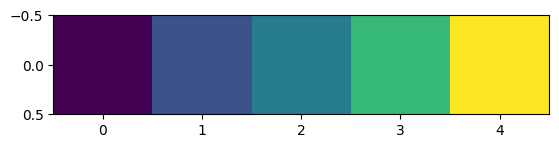

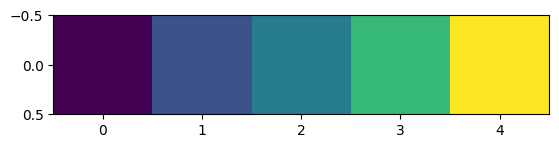

(122, 5, 1)
(122, 5, 1)


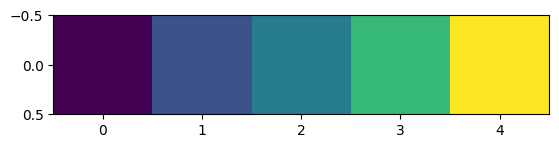

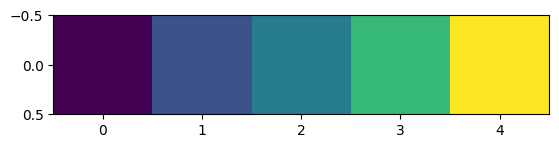

(114, 5, 1)
(114, 5, 1)


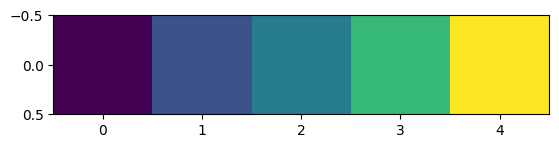

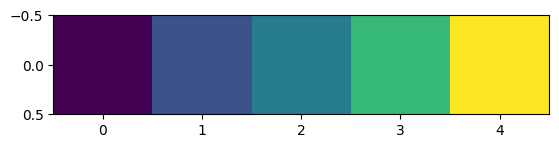

(77, 5, 1)
(77, 5, 1)


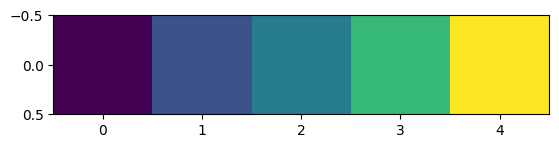

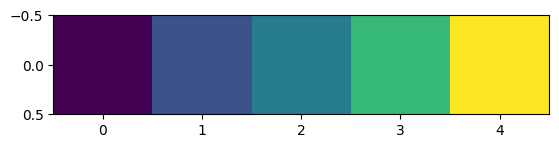

In [20]:
import tensorflow as tf
import numpy as np
for data_set_path in var_results_dados_reais['Data_set'].values:
    data_set = data_set_path.replace('\\', '/').split('/')[-1]
    for steps_ahead in steps_ahead_list:
        for net_type in redes:
            caminho_csv = f"{pasta_dados_reais}/Saída da otimização de hiperparâmetros {net_type}/{data_set}/{steps_ahead} steps ahead/opt_hist.csv"
            caminho_modelo = f"{pasta_dados_reais}/Saída da otimização de hiperparâmetros {net_type}/{data_set}/{steps_ahead} steps ahead/best_model.h5"
            opt_hist = pd.read_csv(caminho_csv)
            params = opt_hist[opt_hist['score'] == opt_hist.score.min()][[c for c in opt_hist.columns if c not in ['score', 'w2', 'w3', 'w4', 'h4']]].to_dict('records')[0]
            '''if net_type == "CNN":
                model = create_model(**params)
            else:
                model = create_lstm_model(**params)
            model.load_weights(caminho_modelo)'''
            X_test, Y_test, inverse_normalizations, normalizations = images_and_targets_from_data_series(
                test_series, input_win_size=params['win_size'], steps_ahead=steps_ahead
            )
            #for image in X_test:
            print(X_test[0].shape)
            plt.imshow(np.transpose(X_test[0][0], ))
            plt.show()